## Salient Object Detection Models
Segmentation models produced segmentation masks that did not fit tightly on the main object in input images, at times conflating clear backgrounds as multiple classes.

This notebook tests Salient Object Detection models (SOD), which identify the main object(s) in an image, and produces a binary mask.

#### rembg
https://github.com/danielgatis/rembg

Removes backgrounds in an image.

In [1]:
!pip install onnxruntime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [2]:
!pip install -q rembg[cli] pillow numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00


In [3]:
import os, io, cv2

from rembg import remove
from PIL import Image
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
import torch

In [5]:
IMG_DIR = "/content/rgb"
OUT_MASK_DIR = "/content/masks"
os.makedirs(OUT_MASK_DIR, exist_ok=True)

images = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith((".png",".jpg",".jpeg"))])

In the following, once the binary mask is produced, we use an OpenCV morphological operation (Closing), which helps get rid of small holes inside the foreground object mask.

See here:
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

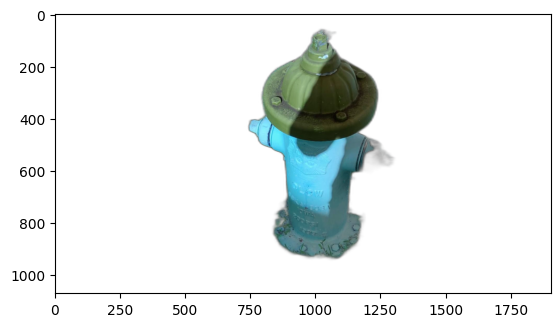

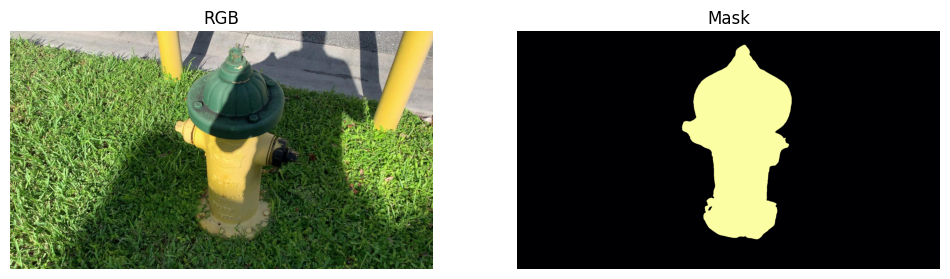

In [11]:

for img in images:
    stem = Path(img).stem
    img_path = os.path.join(IMG_DIR, img)

    input = cv2.imread(img_path)

    #Output is a numpy array
    output = remove(input) #rembg remove function

    plt.imshow(output, cmap="gray")

    # Alpha channel in output represents opacity
    # We threshold the channel to produce a binary mask

    alpha = output[..., 3]
    binary_mask = (alpha > 127).astype(np.uint8) # 1 for foreground

    kernel = np.ones((3,3), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel, iterations=1)

    # If torch tensor needed:
    # mask_tensor = torch.from_numpy(binary_mask).float()

    # Visualisation
    rgb = cv2.imread(img_path)[:, :, ::-1]
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1); plt.imshow(rgb); plt.title("RGB"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(binary_mask, cmap="inferno"); plt.title("Mask"); plt.axis("off")
    plt.show()
